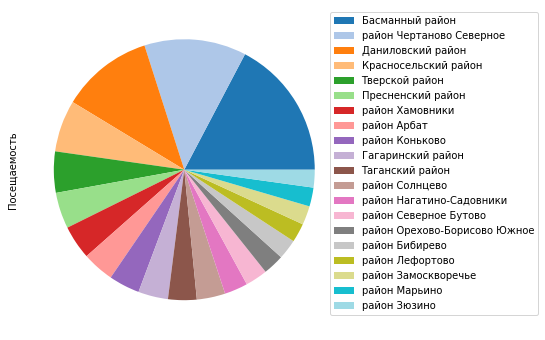

In [2]:
%matplotlib inline
from reportlab.pdfgen import canvas
from reportlab.lib import pagesizes
from reportlab.pdfbase import pdfmetrics
from reportlab.pdfbase.ttfonts import TTFont
from reportlab.lib.utils import ImageReader
from PyPDF2 import PdfFileMerger, PdfFileReader
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def extract_district (x):
    return list(map(lambda a: a["District"], x))[0]

r = requests.get("https://video.ittensive.com/python-advanced/data-7361-2019-11-28.utf.json")
data = pd.DataFrame(json.loads(r.content)).fillna(value=0)
data["District"] = data["ObjectAddress"].apply(extract_district)
data_sum = data.groupby("District").sum().sort_values("NumOfVisitors",
                                                     ascending=False)
fig = plt.figure(figsize=(11,6))
area = fig.add_subplot(1, 1, 1)
data_sum[0:20]["NumOfVisitors"].plot.pie(ax = area,
                                        labels=[""]*20,
                                        label="Посещаемость",
                                        cmap="tab20")
plt.legend(data_sum[0:20].index,
          bbox_to_anchor=(1.5,1,0.1,0))
plt.savefig("readers.png")

pdfmetrics.registerFont(TTFont("Trebuchet", "Trebuchet.ttf"))
PDF = canvas.Canvas("readers.pdf", pagesize=pagesizes.A4)
PDF.setFont("Trebuchet", 48)
PDF.drawString(70, 650, "Посетители библиотек")
PDF.drawString(80, 590, "по районам Москвы")
PDF.setFont("Trebuchet", 13)
PDF.drawString(550, 820, "2")
PDF.drawImage(ImageReader("readers.png"), -200, 150)
PDF.setFont("Trebuchet", 20)
PDF.drawString(100, 150, "Самый популярный район")
PDF.setFont("Trebuchet", 24)
PDF.drawString(100, 120, data_sum.index.get_values()[0])
PDF.setFont("Trebuchet", 20)
PDF.drawString(100, 90,
               "Посетителей: " + str(int(data_sum["NumOfVisitors"].values[0])))
PDF.save()
files = ["title.pdf", "readers.pdf"]
merger = PdfFileMerger()
for filename in files:
    merger.append(PdfFileReader(open(filename, "rb")))
merger.write("report.pdf")